## Transformations in Linear Regression

Linear regression assumes that the dependent variables and its predictors are linearly related to each other.  This applies to the terms you specify in the model estimation.  However, you can apply transformations to those variables before estimating the models.  Transformations can be applied to:

- Just the dependent variable
- One or more predictor variables
- Both predictor and dependent variables.

Some common transformations are outlined here:

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwibtIr4o8rvAhVYXM0KHTl9CXYQFjADegQIFRAD&url=https%3A%2F%2Fonlinepubs.trb.org%2Fonlinepubs%2Fnchrp%2Fcd-22%2Fmanual%2Fv2appendixb.pdf&usg=AOvVaw2MUNcGvy4XZhF9G6DBqFZq


This lesson draws from David Dranove's excellent explanation of log transformations in regression.  I very much recommend that you read it: 

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=15&cad=rja&uact=8&ved=2ahUKEwjI0fu82NvoAhXRWM0KHUuVDCkQFjAOegQICBAB&url=https%3A%2F%2Fcanvas.northwestern.edu%2Ffiles%2F1812457%2Fdownload%3Fdownload_frd%3D1%26verifier%3DQBFTMd2yRHbWR6yC6mp2s0in7G9N3rRZiRFStMrA&usg=AOvVaw1JP3fLhZJA3IEhBHVFbuRq

### Log transformations

In this lesson, we will focus on log transformations, which are among the most common.  First, a refresher on the properties of logs and expoentials.  (It's been a while, so I tend to keep the cheat sheet around!)

![image](log_exp_graph.jpg)

![image](log_properties.gif)

### What happens when we specify a log-transformed regression model?

Let's work out the math...

### Why take logs?

There are two main reasons to specify a log model instead of a linear model:

1. It fits the data better
2. You have a theoretical to think that the relationship should be multiplicative instead of additive

### Let's try again with the wage data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

# this allows plots to appear directly in the notebook
%matplotlib inline

In [6]:
# get the data
# df = pd.read_csv('data/psam_p21.csv')
df = pd.read_csv('data/boston.csv')
df.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
0,1013,581,8,1470.78,227.72,1455.53,1.15
1,1027,441,8,1730.07,568.07,1658.47,1.32
2,884,141,8,918.80,270.28,886.75,1.29
3,1066,445,17,1859.38,572.01,1782.76,1.33
4,1023,875,17,895.77,275.49,858.64,1.33


In [69]:
# keep only the people who have worked within the last 12 months
'''
WKL 1
When last worked
b .N/A (less than 16 years old)
1 .Within the past 12 months
2 .1-5 years ago
3 .Over 5 years ago or never worked
'''

df = df[df['WKL'] == 1]
df = df[df['WAGP'] > 0 ]
len(df)

103185

### Look at the data

It is often a good idea to look at the data we want to model, and see how it relates to some variables we expect to be important.  We can do this using seaborn, which we learned about a few weeks ago.  

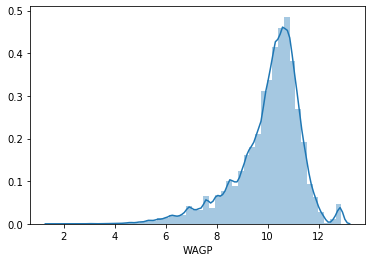

In [58]:
'''
WAGP 6
Wages or salary income past 12 months
bbbbbb .N/A (less than 15 years old)
000000 .None
000001..999999 .$1 to 999999 (Rounded and top-coded)
'''

# sns.distplot(df['WAGP'])
sns.distplot(np.log(1 + df['WAGP']))

/Users/abdulaziz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


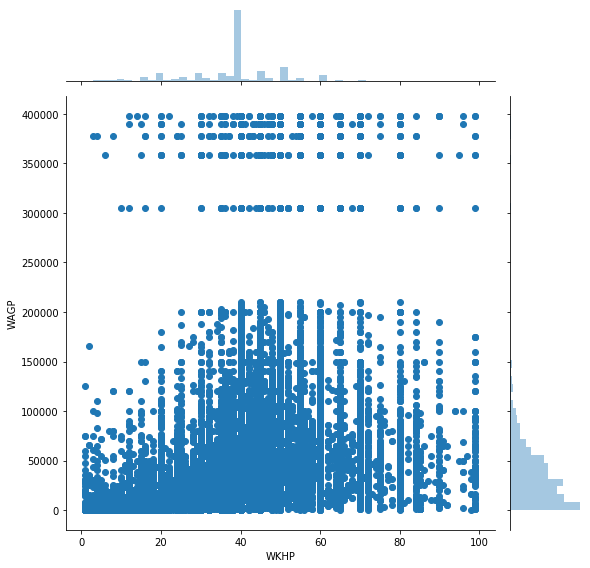

In [14]:
# we may think that wages relate to hours worked, so let's look at that relationship
'''
WKHP 2
Usual hours worked per week past 12 months
bb .N/A (less than 16 years old/did not work during the past 12
.months)
01..98 .1 to 98 usual hours
99 .99 or more usual hours
'''

sns.jointplot(x="WKHP", y="WAGP", data=df, size=8)

### Estimating some models

In [16]:
# linear model
mod = smf.ols(formula='WAGP ~ WKHP', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:58:04   Log-Likelihood:            -1.2536e+06
No. Observations:              103185   AIC:                         2.507e+06
Df Residuals:                  103183   BIC:                         2.507e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.685e+04    458.540    -36.743      0.0

In [17]:
# log-log model
mod = smf.ols(formula='np.log(WAGP) ~ np.log(WKHP)', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(WAGP)   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 6.904e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:58:20   Log-Likelihood:            -1.4579e+05
No. Observations:              103185   AIC:                         2.916e+05
Df Residuals:                  103183   BIC:                         2.916e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8962      0.024    165.028   

In [23]:
# log-linear model
mod = smf.ols(formula='np.log(1+WAGP) ~ WKHP', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGP   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:44:31   Log-Likelihood:            -1.2536e+06
No. Observations:              103185   AIC:                         2.507e+06
Df Residuals:                  103183   BIC:                         2.507e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.685e+04    458.540    -36.743      0.0

In [ ]:
# What makes sense here?

### Categorical variables

We may also want to include categorical variables.  We can include them by calculating a 'dummy' variable, which is 1 if the value is in a category, and zero otherwise.  

In [19]:
'''
SCHL 2
Educational attainment
bb .N/A (less than 3 years old)
01 .No schooling completed
02 .Nursery school, preschool 03 .Kindergarten
04 .Grade 1
05 .Grade 2
06 .Grade 3
07 .Grade 4
08 .Grade 5
09 .Grade 6
10 .Grade 7
11 .Grade 8
12 .Grade 9
13 .Grade 10
14 .Grade 11 15 .12th grade - no diploma
16 .Regular high school diploma
17 .GED or alternative credential
18 .Some college, but less than 1 year
19 .1 or more years of college credit, no degree
20 .Associate's degree
21 .Bachelor's degree
22 .Master's degree
23 .Professional degree beyond a bachelor's degree
24 .Doctorate degree
'''

# Is someone a college grad
df['college_grad'] = df['SCHL'].apply(lambda x : x>=20)

In [20]:
# note that I can wrap long strings with a \ character
mod = smf.ols(formula="np.log(1+WAGP) \
                       ~ np.log(1+WKHP) \
                       + college_grad", 
              data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                 4.549e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:59:12   Log-Likelihood:            -1.3957e+05
No. Observations:              103185   AIC:                         2.791e+05
Df Residuals:                  103182   BIC:                         2.792e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.3776 

In [ ]:
# What would you recommend for age?  

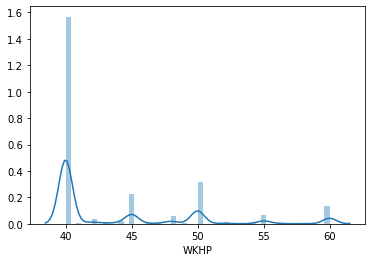

In [81]:
df = df[(df['WKHP'] <= 60) & (df['WKHP'] >= 40)]
# sns.distplot(df['WAGP'])
sns.distplot(df['WKHP'])
# sns.distplot(np.log(1+df['WKHP']))

## Homework

1. Read and understand:

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=15&cad=rja&uact=8&ved=2ahUKEwjI0fu82NvoAhXRWM0KHUuVDCkQFjAOegQICBAB&url=https%3A%2F%2Fcanvas.northwestern.edu%2Ffiles%2F1812457%2Fdownload%3Fdownload_frd%3D1%26verifier%3DQBFTMd2yRHbWR6yC6mp2s0in7G9N3rRZiRFStMrA&usg=AOvVaw1JP3fLhZJA3IEhBHVFbuRq

2. Revisit our previous homework modeling wages.  Specify your best log-log and log-linear models.  What would you recommend in this situation?  

In [87]:
# FOD1P:
# 2100 	computer and information
# 2101 	computer programming and data processing
# 2102	Computer Science
# 2105	Information Sciences
# 2106	Computer Administration Management And Security
# 2107	Computer Networking And Telecommunications

df['college_grad'] = np.where(df['SCHL'] >= 20, 1, 0)
df['college_grad']

df['computer_science'] = np.where(df['FOD1P'] == 2102, 1, 0) 
df['computer_and_information']= np.where(df['FOD1P'] == 2100, 1, 0)
df['computer_programming_and_data_processing'] =np.where(df['FOD1P'] == 2101, 1, 0)
df['Information_Sciences']= np.where(df['FOD1P'] == 2105, 1, 0)
df['Computer_Administration_Management_And_Security'] = np.where(df['FOD1P'] == 2106, 1, 0)
df['computer_Networking_And_Telecommunications']= np.where(df['FOD1P'] == 2107, 1, 0)
# WKHP
# mod = smf.ols(formula='WAGP\
#                         ~ WKHP \
#                         + computer_science \
#                         + computer_and_information \
#                         + computer_programming_and_data_processing \
#                         + Information_Sciences \
#                         + Computer_Administration_Management_And_Security \
#                         + computer_Networking_And_Telecommunications \
#                         + college_grad', 
#               data=df)
# res = mod.fit()
# print(res.summary())
mod = smf.ols(formula='np.log(1+WAGP) ~ np.log(1+WKHP) + C(computer_science) + Information_Sciences+ college_grad', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       np.log(1 + WAGP)   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     3083.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:34:29   Log-Likelihood:                -82425.
No. Observations:               67927   AIC:                         1.649e+05
Df Residuals:                   67922   BIC:                         1.649e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               